## Caso 1: Proporção em uma população

Usamos o teste de hipótese para estimar um parâmetro de uma população.
Cenário: um estudo prévio mostrou que 52% das pessoas entre 18 e 25 anos de São Paulo votariam no candidato João. Um novo estudo com 1018 pessoas foi realizado e a nova porcentagem foi de 56%. A proporção de pessoas da população (que é o parâmetro) aumentou?

- População: População com idade entre 18 e 25 anos de São Paulo
- Paramêtro **p** de interesse: proporção de pessoas que votariam em João
- Hipótese Nula: 52% votaria no candidato João
- Hipótese Alternativa: A proporção é maior que 52%

Erro padrão estimado para proporções:

$$SE_{proporção} = \sqrt{\frac{p_{nulo}\ (1 - p_{nulo})}{n}}$$


$$\frac{Medida - H_0}{SE_{proporção}}$$ 

In [29]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import scipy.stats.distributions as dist

n = 1018
p_nulo = .52
p_alternativo = .56

se = np.sqrt((p_nulo*(1-p_nulo))/n)
se

0.015658436718635507

In [13]:
eixo_x = (p_alternativo-p_nulo)/se
eixo_x

2.5545334262132955

In [18]:
from scipy.stats import t
area_acima = 1-t.cdf(eixo_x,n-1)
area_acima

0.005388877461084185

In [19]:
# Podemos usar um método diretamente, mas não fica elegante...
import statsmodels.api as sm
sm.stats.proportions_ztest(p_alternativo * n, n, p_nulo, alternative='larger', prop_var=p_nulo)

(2.5545334262132955, 0.005316510991822442)

Como p-value (a área sob a curva) foi 0.005388877461084185 e é menor que 0.05, rejeitamos a hipótese nula.

## Caso 2: Diferença da proporção entre populações

Existe uma diferença significante na proporção populacional de homens e mulheres com idade entre 18 e 25 anos de São Paulo que votariam no candidato João?

- População: Mulheres e Homens com idade entre 18 e 25 anos de São Paulo
- Paramêtro de interesse: $p_{homens} - p_{mulheres}$ (proporção de homens/mulheres que votariam em João)
- Hipótese Nula: $p_{homens} - p_{mulheres} = 0$
- Hipótese Alternativa: $p_{homens} - p_{mulheres} \neq 0$


In [47]:
n_homens = 247
n_mulheres = 308
n = n_homens + n_mulheres

x_homens = 91
x_mulheres = 120
x = x_homens + x_mulheres

p_homens = round(x_homens/n_homens,2)
p_mulheres = round(x_mulheres/n_mulheres,2)

p = x/n

In [48]:
se_homens = np.sqrt( (p *(1-p))/n_homens )
se_mulheres = np.sqrt( (p *(1-p))/n_mulheres )
se = np.sqrt( se_homens**2+ se_mulheres**2 )
se

0.04146198808473324

In [49]:
eixo_x = (p_homens - p_mulheres) / se
eixo_x

-0.4823695371077548

In [57]:
# area acima do ponto -np.abs(eixo_x) e depois de np.abs(eixo_x)
area = 2*dist.norm.cdf(-np.abs(eixo_x))
area

0.6295434573871281

Não temos evidências para rejeitar a hipótese nula de que a diferença da proporções é zero.  

## Caso 3 - Média de uma população

A média da distância da cambalhota (cartwheel) para adultos é maior que 80 polegadas?

- **População**: todos adultos
- **Parâmetro de interesse**: $\mu$, média populacional da distância da cambalhota
- **Hipótese Nula:** $\mu$ = 80
- **Hipótese Alternativa:** $\mu$ > 80

n = 25 Adultos

$\mu = 82.46$

$\sigma = 15.06$

In [59]:
df = pd.read_csv("data/Cartwheeldata.csv")

n = len(df)
n

25

In [63]:
media = df['CWDistance'].mean()
media

82.48

In [64]:
sd = df['CWDistance'].std()
sd

15.058552387264852

In [65]:
se = sd/np.sqrt(n)
se

3.0117104774529704

In [66]:
eixo_x = (media - 80) / se
eixo_x

0.8234523266982029

In [73]:
area_abaixo = 1-dist.norm.cdf(eixo_x)
area_abaixo

0.20512540845395266

In [67]:
# usando a biblioteca
sm.stats.ztest(df["CWDistance"], value = 80, alternative = "larger")

(0.8234523266982029, 0.20512540845395266)

Não temos evidências para rejeitar a hipótese nula de que a distância da cambalhora é igual 80

## Caso 4 - Comparação da média de duas populações

Homens tem maior indice de massa coporal que as mulheres?

- **População**: todos adultos
- **Parâmetro de interesse**: $\mu_1 - \mu_2$
- **Hipótese Nula:** $\mu_1 = \mu_2$  
- **Hipótese Alternativa:** $\mu_1 \neq \mu_2$

In [79]:
df = pd.read_csv("data/nhanes_2015_2016.csv")

In [99]:
mulheres = df[df['RIAGENDR']==2]
homens = df[df['RIAGENDR']==1]

In [100]:
media_mulheres = mulheres['BMXBMI'].mean()
sd_mulheres = mulheres['BMXBMI'].std()
n_mulheres = len(mulheres)
(media_mulheres,sd_mulheres,n_mulheres)

(29.93994565217392, 7.753318809545674, 2976)

In [101]:
media_homens = homens['BMXBMI'].mean()
sd_homens  = homens['BMXBMI'].std()
n_homens = len(homens)
(media_homens,sd_homens,n_homens)

(28.778072111846942, 6.2525676168014614, 2759)

In [102]:
se_homens = sd_homens/np.sqrt(n_homens)
se_mulheres = sd_mulheres/np.sqrt(n_mulheres)
se = np.sqrt( se_homens**2+ se_mulheres**2 )
se

0.18538992862064446

In [103]:
diff = media_mulheres - media_homens
diff

1.161873540326976

In [104]:
eixo_x = diff/se
eixo_x

6.267188023490038

In [105]:
# area acima do ponto -np.abs(eixo_x) e depois de np.abs(eixo_x)
area = 2*dist.norm.cdf(-np.abs(eixo_x))
area

3.6762616158578853e-10

In [106]:
# Usando a biblioteca - levemente diferente, arredondamento?
sm.stats.ztest(mulheres["BMXBMI"].dropna(), homens["BMXBMI"].dropna())

(6.1755933531383205, 6.591544431126401e-10)

Rejeitamos a hipótese nula, isto é, as médias são diferentes

## Exemplo da distância da cambalhota (one sample test)

- população: todos adultos
- parâmetro de interesse da população: distância média ($\mu$) na cambalhota
- amostra: 25 adultos

Teste: a distância da cambalhota é maior que 80 inches a um nível de significância de 5%?

- Hipótese Nula: distância média $\mu$ na população é 80 ($ H_0: \mu = 80$)
- Hipótese Alternativa: distância média $\mu$ na população é maior que 80 ($ H_a: \mu >80$)

Condições:

1. A amostra em questão é SRS (simple Random Sample)
2. A distribuição das distância é normal na população

Se as distâncias não seguirem uma distribuição normal, podemos usar a mediana e usar o teste de Wilcoxon Signed Rank Test

A média da amostra coletada é 82.48. Se repetirmos esse processo com outra amostra obteremos outra média.

Pergunta: a média da amostra de 82.48 é significativamente maior que a média hipotética de 80?

2.48 é uma diferença signifcante ou é reflete uma variabilidade natural na média das amostras?

In [4]:
import pandas as pd
data = pd.read_csv("data/Cartwheeldata.csv")
data.describe()["CWDistance"]

count     25.000000
mean      82.480000
std       15.058552
min       63.000000
25%       70.000000
50%       81.000000
75%       92.000000
max      115.000000
Name: CWDistance, dtype: float64

erro padrão estimado = quão longe a média da amostra tende estar longe da média verdadeira?

t = (melhor estimativa - valor nulo)/erro padrão estimado

Nossa média amostral (82.48) é apenas 0.82 erros padrões acima do valor null de 80

Se a hipótese nula for verdadeira, um teste estatístico de t = 0.82 serua suficiente para rejeitar a hipótese nula?

pvalue = probabilidade de ver um teste estatístico de 0,82 (ou maior) assumir que a hipótese nula é verdadeira

Se a média da população fosse 80, então observar uma média da amostra de 82.48 ou maior é **bastante provável**, pois em 20% do tempo veremos valores maiores que 80

Se o valor do pvalue for maior que o nível de significância, não temos evidência suficiente para rejeitar a hipótese nula

In [10]:
tvalue = (82.48 - 80)/(15.058552/5)
tvalue

0.8234523478751489

In [16]:
from scipy.stats import t
grau = 25-1

pvalue = 1 - t.cdf(tvalue,grau)
pvalue

0.20917932695136643

## Comparação da diferença da média entre duas populações pareadas (mesmo individuos medidos duas vezes)

Há diferenças nas medidas?

Parametro de interesse: diferença média $\mu_d$

diff = medida1-medida2

Teste: a distância da cambalhota é maior que 80 inches a um nível de significância de 5%?

- Hipótese Nula: diferença média $\mu_d$ é zero ($ H_0: \mu_d = 0$)
- Hipótese Alternativa: diferença média $\mu_d$ não é zero ($ H_a: \mu_d \neq 0$)

Condições:

 - amostras aleatórias 
 - a diferença (medidas1-medidas2) devem ser normamente distríbuidas (podemos olhar o gráfico QQ)


In [25]:
medidas1=pd.Series([380,560,425,389,568,651])
medidas2=pd.Series([325,470,420,375,574,595])
diff=medidas1-medidas2
diff

0    55
1    90
2     5
3    14
4    -6
5    56
dtype: int64

In [22]:
medidas1

0    380
1    560
2    425
3    389
4    568
5    651
dtype: int64

((array([-1.23132171, -0.63003387, -0.19819716,  0.19819716,  0.63003387,
          1.23132171]), array([-6,  5, 14, 55, 56, 90])),
 (40.5824843729534, 35.666666666666664, 0.9664359792939513))

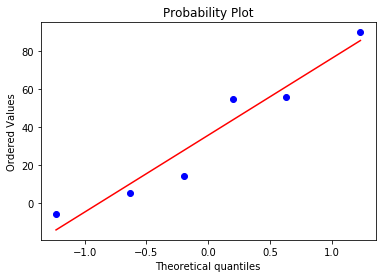

In [28]:
# verificando se as diferenças são normamente distríbuidas
import numpy as np 
import pylab 
import scipy.stats as stats

stats.probplot(diff, dist="norm", plot=pylab)

In [37]:
import math
tvalue = (diff.mean() - 0)/(diff.std() /math.sqrt(6))
tvalue

from scipy.stats import t
grau = 6-1

pvalue = 1 - t.cdf(tvalue,grau)
2*pvalue # não rejeitamos hipótese nula

0.06521139673694831

## Comparação da diferença da média entre duas populações idependentes (não pareadas , ie, com individuos diferentes)

Parametro de interesse: diferença média 

diff = medida1-medida2

Teste: a distância da cambalhota é maior que 80 inches a um nível de significância de 5%?

- Hipótese Nula: diferença média $\mu_d$ é zero ($ H_0: \mu_1 = \mu_2$)
- Hipótese Alternativa: diferença média $\mu_d$ não é zero ($ H_a: \mu_1 \neq \mu_2$)

Condições:

1. amostras aleatórias

2. amostras independentes

3. medidas do BMI normais em ambas pooulações

In [39]:
df = pd.read_csv("data/nhanes_2015_2016.csv")

mulheres = df[df['RIAGENDR']==2]
mulheres = mulheres['BMXBMI']

homens = df[df['RIAGENDR']==1]
homens = homens['BMXBMI']

In [50]:
diff = mulheres.mean()-homens.mean()
diff

1.161873540326976

((array([-3.49970662, -3.25584018, -3.12097485, ...,  3.12097485,
          3.25584018,  3.49970662]),
  array([14.5, 14.5, 15.5, ...,  nan,  nan,  nan])),
 (nan, nan, nan))

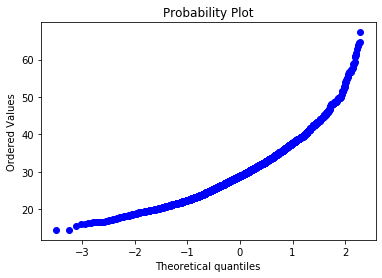

In [47]:
import numpy as np 
import pylab 
import scipy.stats as stats

stats.probplot(mulheres, dist="norm", plot=pylab)

((array([-3.47947379, -3.23428348, -3.09861303, ...,  3.09861303,
          3.23428348,  3.47947379]),
  array([15.1, 16. , 16.2, ...,  nan,  nan,  nan])),
 (nan, nan, nan))

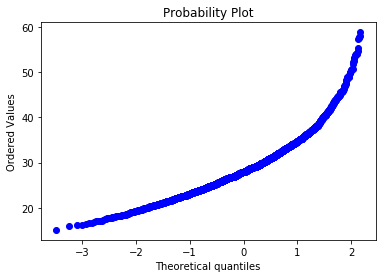

In [49]:
import numpy as np 
import pylab 
import scipy.stats as stats

# o QQ plot mostra que as medidas não são normais, porém temos uma amostra 
# grande e podemos usar o teorema do limite central

stats.probplot(homens, dist="norm", plot=pylab)